In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import graphviz

In [81]:
# df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022.parquet")
df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022_LessThan40.parquet")
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_PSU,_AGE80,_MICHD
2087,1,0,0,0,0,0,0,0,0,0,...,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.142471,-1.016613,2.0
2088,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,-1.142257,0.380796,1.0
2090,1,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-1.141831,-0.118279,2.0
2091,1,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.141618,-1.415873,2.0
2093,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-1.141191,-0.717168,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.814725,0.580426,2.0
431676,0,0,0,0,0,0,0,0,0,0,...,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,0.814939,-0.018464,2.0
431677,0,0,0,0,0,0,0,0,0,0,...,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,0.815152,-1.216243,2.0
431680,0,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,0.815791,-1.515688,2.0


In [82]:
target = df._MICHD
target.value_counts()

2.0    108922
1.0     13898
Name: _MICHD, dtype: int64

In [86]:
df = df.drop("_MICHD", axis =1)
duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0", "_SEX_1.0", "CELLSEX1_2.0", "CELLSEX1_1.0" ]
df = df.drop(duplicate_cols_to_drop, axis=1)
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,DROCDY4_,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_PSU,_AGE80
2087,1,0,0,0,0,0,0,0,0,0,...,-0.117906,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.142471,-1.016613
2088,1,0,0,0,0,0,0,0,0,0,...,-0.301975,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,-1.142257,0.380796
2090,1,0,0,0,0,0,0,0,0,0,...,-0.301975,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-1.141831,-0.118279
2091,1,0,0,0,0,0,0,0,0,0,...,-0.226182,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.141618,-1.415873
2093,1,0,0,0,0,0,0,0,0,0,...,0.780781,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-1.141191,-0.717168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.150389,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.814725,0.580426
431676,0,0,0,0,0,0,0,0,0,0,...,0.239403,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,0.814939,-0.018464
431677,0,0,0,0,0,0,0,0,0,0,...,0.163610,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,0.815152,-1.216243
431680,0,0,0,0,0,0,0,0,0,0,...,-0.193699,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,0.815791,-1.515688


In [5]:
# create logistic regressor 
lregCV = LogisticRegressionCV(n_jobs=-1,max_iter=10000)
# lregCV = LogisticRegressionCV(n_jobs=-1,penalty='l1',solver='saga',max_iter=1000)
# l1 - drives some of the features to 0 because - absolute value 
# l2 - will just make weights small - square 

In [6]:
# fit decision tree classifier
lregCV.fit(df,target)

LogisticRegressionCV(max_iter=10000, n_jobs=-1)

In [7]:
# feature coefficients
coef = lregCV.coef_[0]
coef = pd.Series(coef,index=df.columns).sort_values(ascending=False)

In [8]:
coef

CVDSTRK3_2.0    0.309612
SEXVAR_2.0      0.281482
GENHLTH_1.0     0.248049
DIABETE4_3.0    0.193207
CHCKDNY2_2.0    0.178638
                  ...   
PERSDOC3_2.0   -0.242094
_AGE80         -0.271291
SEXVAR_1.0     -0.281778
CVDSTRK3_1.0   -0.290920
_RFHLTH_2.0    -0.329803
Length: 502, dtype: float64

In [9]:
zero_conditon = (coef >= -0.01) & (coef <= 0.01)
coef = coef[~zero_conditon]

In [10]:
coef.sort_values(ascending=False)

CVDSTRK3_2.0    0.309612
SEXVAR_2.0      0.281482
GENHLTH_1.0     0.248049
DIABETE4_3.0    0.193207
CHCKDNY2_2.0    0.178638
                  ...   
PERSDOC3_2.0   -0.242094
_AGE80         -0.271291
SEXVAR_1.0     -0.281778
CVDSTRK3_1.0   -0.290920
_RFHLTH_2.0    -0.329803
Length: 235, dtype: float64

In [11]:
coef_filtered = pd.concat([coef.head(10), coef.tail(10)])
coef_filtered

CVDSTRK3_2.0    0.309612
SEXVAR_2.0      0.281482
GENHLTH_1.0     0.248049
DIABETE4_3.0    0.193207
CHCKDNY2_2.0    0.178638
PERSDOC3_1.0    0.156052
CHCCOPD3_2.0    0.144063
EMPLOY1_1.0     0.100071
DIFFWALK_2.0    0.090625
PNEUVAC4_2.0    0.090059
PNEUVAC4_1.0   -0.104579
CHCCOPD3_1.0   -0.140201
CHECKUP1_1.0   -0.158350
CHCKDNY2_1.0   -0.162568
DIABETE4_1.0   -0.186287
PERSDOC3_2.0   -0.242094
_AGE80         -0.271291
SEXVAR_1.0     -0.281778
CVDSTRK3_1.0   -0.290920
_RFHLTH_2.0    -0.329803
dtype: float64

In [72]:
feature_dict= {
    "CVDSTRK3_2.0": "No Stroke",
    "GENHLTH_1.0": "General Health: Excellent",
    "CHCKDNY2_2.0":"No Kidney Disease",
    "DIABETE4_3.0": "No diabetes",
    "SEXVAR_2.0":  "Female", 
    "CHCCOPD3_2.0": "No C.O.P.D.",
    "PERSDOC3_1.0": "Has Personal Health Care Provider", 
    "PERSDOC3_3.0": "No Personal Health Care Provider",
    "SEXVAR_1.0": "Male", 
    "DIABETE4_1.0": "Has Diabetes", 
    "CHCKDNY2_1.0": "Has Kidney Disease",
    "CHECKUP1_1.0": "Last Visited Doc in past Year",
    "GENHLTH_4.0": "Fair General Health",
    "_RFHLTH_2.0": "Adults with Fair or Poor Health",
    "PERSDOC3_2.0": "More than 1 Personal Heath Provider",
    "CVDSTRK3_1.0": "Had a Stroke",
    "_AGE80": "Age",
    "EMPLOY1_1.0": "Employed For Wages",
    "MARITAL_5.0": "Never Married",
    "CHCCOPD3_1.0": "Has C.O.P.D",
    "_AGEG5YR_13.0": "Age 80+", 
    "DIFFWALK_1.0": "Has Difficulty Walking",
    "HAVARTH4_2.0": "No Arthritis",
    "_PRACE2_3.0": "Indian or Alaskan Native",
    "DIFFWALK_2.0": "No Difficulty Walking",
    "PNEUVAC4_2.0": "Never Received Pneumococcal Vaccine",
    "PNEUVAC4_1.0": "Received Pneumococcal Vaccine",
    "DROCDY4_":  "Drink Occasions Per Day",
    "_DRDXAR2_2.0": "No Arthritis",
    "RMVTETH4_3.0": "Number of Teeth Removed",
    "PHYSHLTH": "Healthy Day Count in Past 30 Days",
    "_BMI5":"BMI"
    
}

# duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0" ]

In [35]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in coef_filtered.index]
coef_filtered.index = mapped_columns
# coef_filtered

No Stroke                              0.309612
Female                                 0.281482
General Health: Excellent              0.248049
No diabetes                            0.193207
No Kidney Disease                      0.178638
Has Personal Health Care Provider      0.156052
No C.O.P.D.                            0.144063
Employed For Wages                     0.100071
No Difficulty Walking                  0.090625
Never Received Pneumococcal Vaccine    0.090059
Received Pneumococcal Vaccine         -0.104579
Has C.O.P.D                           -0.140201
Last Visited Doc in past Year         -0.158350
Has Kidney Disease                    -0.162568
Has Diabetes                          -0.186287
More than 1 Personal Heath Provider   -0.242094
Age                                   -0.271291
Male                                  -0.281778
Had a Stroke                          -0.290920
Adults with Fair or Poor Health       -0.329803
dtype: float64

Text(0.5, 0, 'feature weights')

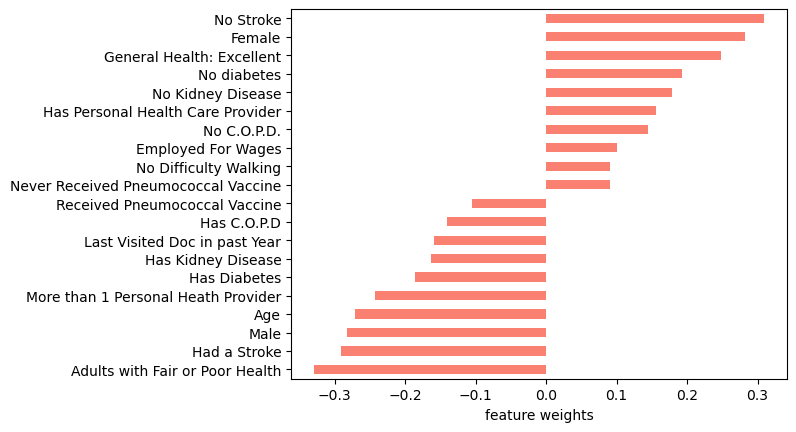

In [94]:
display(coef_filtered.sort_values(ascending=False))
coef_filtered.sort_values(ascending=True).plot.barh(color='salmon')
plt.xlabel('feature weights')

In [47]:
# # compute accuracy rate
# accuracy_rate = lregCV.score(df,target)
# print("Accuracy Logistic Regression", accuracy_rate)

In [54]:
# initialize tree
dtree = DecisionTreeClassifier(random_state=0)

# define parameter grid to search for lowest validation error rate
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# initialize cross-validation
dtreeCV = GridSearchCV(dtree,
                      param_grid=parameters,
                      return_train_score=True,
                      n_jobs=-1)

In [55]:
# fit tree using cross-validation to select best tree
dtreeCV.fit(df,target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [56]:
# readout best parameter value
dtreeCV.best_params_

{'max_depth': 5}

In [57]:
acc = dtreeCV.score(df,target)
print('accuracy on training set',acc.round(3))
print("Validation Score", dtreeCV.best_score_)
print("Baseline", (target.value_counts()[2.0] / target.value_counts().sum()))

accuracy on training set 0.889
Validation Score 0.8881615372089235
Baseline 0.8868425337892851


In [58]:
target.value_counts()

2.0    108922
1.0     13898
Name: _MICHD, dtype: int64

In [59]:
dtree = dtreeCV.best_estimator_
feature_importances = dtree.feature_importances_
feature_importances = pd.Series(feature_importances,index=df.columns).sort_values(ascending=False)

In [73]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in feature_importances.index]
feature_importances.index = mapped_columns
feature_importances = feature_importances[feature_importances.values >0]
feature_importances

Adults with Fair or Poor Health        0.394963
Age                                    0.201831
No Stroke                              0.153950
Male                                   0.058870
More than 1 Personal Heath Provider    0.051879
Has Diabetes                           0.029964
Female                                 0.025741
No C.O.P.D.                            0.025697
No Kidney Disease                      0.017320
General Health: Excellent              0.013229
Has C.O.P.D                            0.010409
Fair General Health                    0.005474
Number of Teeth Removed                0.003207
Drink Occasions Per Day                0.002342
No Arthritis                           0.001951
Healthy Day Count in Past 30 Days      0.001690
BMI                                    0.001485
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

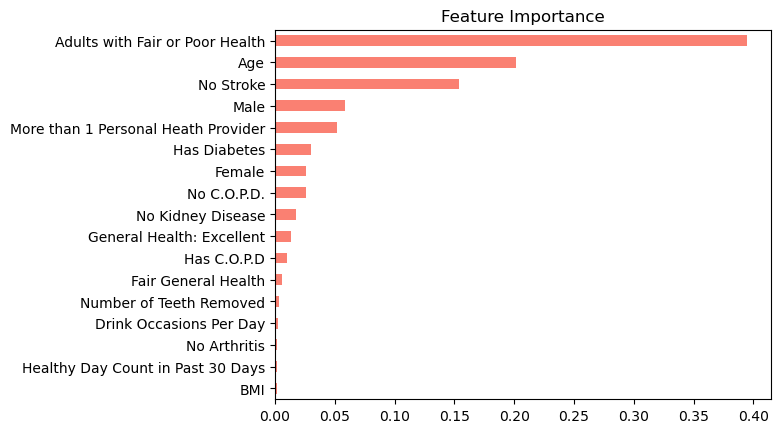

In [74]:
feature_importances.sort_values().plot.barh(color='salmon')
plt.title('Feature Importance')

In [76]:
df.rename(columns=feature_dict, inplace=True)



In [77]:
dtree_string = export_text(dtree,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)

|----- Adults with Fair or Poor Health <= 0.5
|     |----- Age <= 0.4
|     |     |----- No Stroke <= 0.5
|     |     |     |----- Female <= 0.5
|     |     |     |     |----- Drink Occasions Per Day <= -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Drink Occasions Per Day >  -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Female >  0.5
|     |     |     |     |----- Has C.O.P.D <= 0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Has C.O.P.D >  0.5
|     |     |     |     |     |----- class: 2.0
|     |     |----- No Stroke >  0.5
|     |     |     |----- Has Diabetes <= 0.5
|     |     |     |     |----- Age <= -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Age >  -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Has Diabetes >  0.5
|     |     |     |     |----- More than 1 Personal Heath Provider <= 0.5
|     |     |   

In [96]:
# initialize tree
dtree_deep3 = DecisionTreeClassifier(max_depth=3)
dtree_deep3.fit(df, target)
dtree_string = export_text(dtree_deep3,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)


|----- _RFHLTH_2.0 <= 0.5
|     |----- _AGE80 <= 0.4
|     |     |----- CVDSTRK3_2.0 <= 0.5
|     |     |     |----- class: 2.0
|     |     |----- CVDSTRK3_2.0 >  0.5
|     |     |     |----- class: 2.0
|     |----- _AGE80 >  0.4
|     |     |----- SEXVAR_2.0 <= 0.5
|     |     |     |----- class: 2.0
|     |     |----- SEXVAR_2.0 >  0.5
|     |     |     |----- class: 2.0
|----- _RFHLTH_2.0 >  0.5
|     |----- CVDSTRK3_2.0 <= 0.5
|     |     |----- CHCKDNY2_2.0 <= 0.5
|     |     |     |----- class: 1.0
|     |     |----- CHCKDNY2_2.0 >  0.5
|     |     |     |----- class: 2.0
|     |----- CVDSTRK3_2.0 >  0.5
|     |     |----- _AGE80 <= 0.1
|     |     |     |----- class: 2.0
|     |     |----- _AGE80 >  0.1
|     |     |     |----- class: 2.0



_MICHD:    
1.0: Have coronary heart disease (CHD) or myocardial infarction (MI)      
2.0: Do NOT Have coronary heart disease (CHD) or myocardial infarction (MI)     

In [100]:
conda install graphviz

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - anaconda
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.10.0
    latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/duvallar/.conda/envs/dm_duvallar

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h516909a_2         536 KB  conda-forge
    cairo-1.16.0               |       hb05425b_5         1.5 MB  anaconda
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.8

In [99]:
# display tree
dot_data = export_graphviz(dtree_deep3,
            out_file=None,
            feature_names=df.columns,
            # class_names = ['bad','good'],
            proportion=True,
            impurity=False,
            filled=True,
            rounded=True)
graph = graphviz.Source(dot_data)
# graph.render('RedWine')
graph

NameError: name 'export_graphviz' is not defined